In [3]:
import pandas as pd;
import numpy as np;
from sklearn.feature_selection import SelectKBest, chi2
from scipy import stats


In [33]:
df = pd.read_csv("heart.csv",na_values= ['nan','na','Nan'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


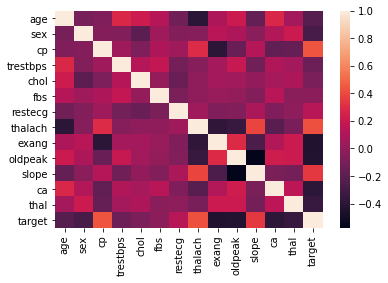

In [50]:
import seaborn as sb
import matplotlib.pyplot as mp
# import file with data
# data=pd.read_csv("C:\\Users\\Vanshi\\Desktop\\cumulative.csv")
  
# plotting correlation heatmap
dataplot=sb.heatmap(df.corr())
  
# displaying heatmap
mp.show()

In [41]:
# def heatmap(im, data=None, valfmt="{x:.2f}",
#                      textcolors=("black", "white"),
#                      threshold=None, **textkw):

#     if not isinstance(data, (list, np.ndarray)):
#         data = im.get_array()
#     if threshold is not None:
#         threshold = im.norm(threshold)
#     else:
#         threshold = im.norm(data.max())/2.
#     kw = dict(horizontalalignment="center",
#               verticalalignment="center")
#     kw.update(textkw)
#     if isinstance(valfmt, str):
#         valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
#     texts = []
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
#             text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
#             texts.append(text)

#     return texts


In [28]:
fuel_transmission = pd.crosstab(df['max_power'], df['torque'], margins=True)

In [29]:
fuel_transmission

torque,"10.2@ 2,600(kgm@ rpm)","10.4@ 3,200(kgm@ rpm)","10.7@ 2,500(kgm@ rpm)","10.7@ 2,600(kgm@ rpm)",100Nm@ 2700rpm,101Nm@ 3000rpm,102Nm@ 2600rpm,102Nm@ 4000rpm,103Nm@ 4500rpm,104Nm@ 3100rpm,...,96Nm@ 2500rpm,96Nm@ 3000rpm,96Nm@ 3500rpm,98Nm@ 1600-3000rpm,99.04Nm@ 4500rpm,99.07Nm@ 4500rpm,99.1Nm@ 4500rpm,99.8Nm@ 2700rpm,99Nm@ 4500rpm,All
max_power,,,,,,,,,,,,,,,,,,,,,
100 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
100.5 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
100.57 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
100.6 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
101 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98.97 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
99 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
99.23 bhp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [30]:
def categorical_dependency(cros_tab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(cros_tab_table)
    print(stat)
    print('P-value',p)
    alpha = 1.0 - confidence_interval;
    if p<=alpha:
        print('Dependent (Reject H0)')
    else:
        print('Independent (Fail to reject H0)')
    return expected;
    

In [31]:
categorical_dependency(fuel_transmission, 0.90)

1789231.270267366
P-value 0.0
Dependent (Reject H0)


array([[1.13837592e-02, 2.27675183e-02, 3.41512775e-02, ...,
        3.41512775e-02, 2.39058943e-01, 9.00000000e+01],
       [3.79458639e-04, 7.58917278e-04, 1.13837592e-03, ...,
        1.13837592e-03, 7.96863142e-03, 3.00000000e+00],
       [6.32431065e-04, 1.26486213e-03, 1.89729320e-03, ...,
        1.89729320e-03, 1.32810524e-02, 5.00000000e+00],
       ...,
       [5.05944852e-04, 1.01188970e-03, 1.51783456e-03, ...,
        1.51783456e-03, 1.06248419e-02, 4.00000000e+00],
       [1.13837592e-03, 2.27675183e-03, 3.41512775e-03, ...,
        3.41512775e-03, 2.39058943e-02, 9.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 3.00000000e+00, ...,
        3.00000000e+00, 2.10000000e+01, 7.90600000e+03]])

In [63]:
y = df[['target']]
X = df.drop('target',axis=1)

In [64]:
df.columns
len(df.columns)

14

In [68]:
X_new = (chi2, k=3).fit_transform(X,y)
X_new

SyntaxError: invalid syntax (<ipython-input-68-e9bcdb8e87be>, line 1)

In [70]:
select_k_best_classifier = SelectKBest(chi2, k=3).fit_transform(X,y)
dataframe = pd.DataFrame(select_k_best_classifier)
dataframe = pd.DataFrame(fit_transofrmed_features, columns=features_names)
dataframe

NameError: name 'fit_transofrmed_features' is not defined

In [73]:
selector = SelectKBest(chi2, k=5)
selector.fit(X,y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

In [77]:
for i in range(1, len(df.columns)-5):
    selector = SelectKBest(chi2, k=i)
    selector.fit(X,y)
    # Get columns to keep and create new dataframe with those only
    cols = selector.get_support(indices=True)
    features_df_new = X.iloc[:,cols]
    print(features_df_new.columns)

Index(['thalach'], dtype='object')
Index(['thalach', 'oldpeak'], dtype='object')
Index(['thalach', 'oldpeak', 'ca'], dtype='object')
Index(['cp', 'thalach', 'oldpeak', 'ca'], dtype='object')
Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')
Index(['cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')
Index(['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')
Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')
